# In this notebook
- understand the boundary of DL and other concepts
- able to build a DL NN
- validate DL model


In [1]:
#import libraries

from util_functions.model import *
from util_functions.opt_func import *
from util_functions.testCases import *
from config import nn_config

import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import skimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


# What is DL 
- reflect to other mathemetical algorithms and models?
  - sequencial model, feature learning, activation function, kernel regression
  
- what is the typical setting?
  - initialization, parameter setting, optimization, 
  
- best use cases?
  - NLP, imagine recognition etc 

In [2]:

# slide and plots for demo here



# How to prepare data for DL
- dimension
- train, test, validation split

In [4]:

#read data
DATA_PATH = '/Users/yudiwang/Desktop/playground/deep_learning_comparative_study/exercises/data/'

train_x_orig, train_y, test_x_orig, test_y, classes = load_data(DATA_PATH)

# check data dimension
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))



train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


# How to build a DL Network?
- NN
- CNN
    - best for grid like topology 2D image
    - convolution and pooling
    - slide filter and feature map, sparse interaction
    - design structure
    - image recognition and pattern recognition etc
    
- RNN
etc

In [5]:
parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


In [6]:
#forward computing
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))


With sigmoid: A = [[0.96890023 0.11013289]]


## Define loss function
- Regression: MSE, RMSE
- Binary: log loss

In [7]:
#compute cost
Y, AL = compute_cost_test_case()

print("cost = " + str(loss_function(AL, Y)))

cost = 0.41493159961539694


In [8]:
#backward computing
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]



## Convert ML to Opt for DNN
Goal is to minimize expected loss on training set
- SGD 
- Local minima myth from spurious surface of DNN
- AdaGrad, RMSProp, Adam : difference in adaptivity
- Bring in Hession for global opt: LBFGS 
- 


In [9]:
#update parameters

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [10]:
#put things together

### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)



Cost after iteration 0: 0.6972515266984297
Cost after iteration 100: 0.6258189987064959
Cost after iteration 200: 0.5605784060355862
Cost after iteration 300: 0.47831279192181125
Cost after iteration 400: 0.4526603729238983
Cost after iteration 500: 0.4117255706045356
Cost after iteration 600: 0.3852504336082606
Cost after iteration 700: 0.3231118569806582
Cost after iteration 800: 0.27645830994028087
Cost after iteration 900: 0.2298164725400055
Cost after iteration 1000: 0.20493986146142718
Cost after iteration 1100: 0.14833542043020975
Cost after iteration 1200: 0.12379884037384455
Cost after iteration 1300: 0.3627589556997483
Cost after iteration 1400: 0.09626278773471086
Cost after iteration 1500: 0.08190948311294277
Cost after iteration 1600: 0.07132282993992237
Cost after iteration 1700: 0.06314932895996458
Cost after iteration 1800: 0.05612670144299609
Cost after iteration 1900: 0.04983386622727822
Cost after iteration 2000: 0.04518876152270858
Cost after iteration 2100: 0.04124

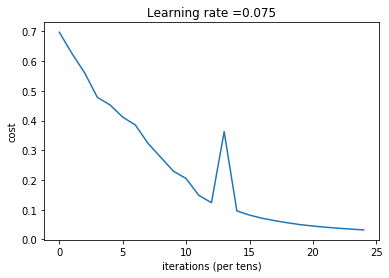

In [11]:
# could be furtherly improve for tuning
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)


Accuracy: 0.9999999999999998
Accuracy: 0.72


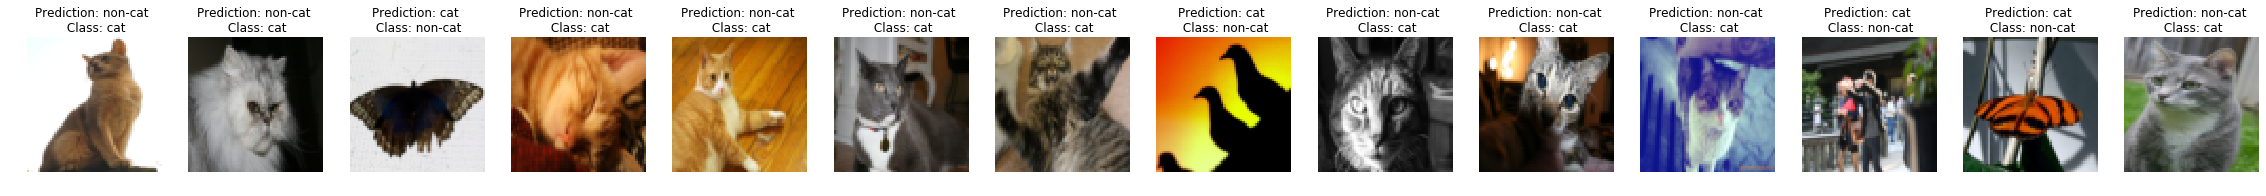

In [12]:
predictions_train = predict(train_x, train_y, parameters)


pred_test = predict(test_x, test_y, parameters)


print_mislabeled_images(classes, test_x, test_y, pred_test)

# Training and parameter tuning for DL
- optimization
- parameter tuning
- best training practice

# What are the evaluation metrics?
- Supervised
    - Regression
    - Classificatiohn
- Unsupervised
    - clustering
    - etc
    
# How to make prediction?
- Regression
- Classification

# How to extrapolate information? 
- Final tuned parameter set
- etc

# What is missing?
- state-of-art optimization
- new NN design for new data

## *Reference*
- [Opt for traning DNN](https://drive.google.com/file/d/1VKxvVy1OZbor5PjfTEQYuBzTOWu1VQwG/view?usp=sharing)